# OpenSBLI Benchmark

## Setup Section

In [1]:
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def gettiming(filename):
    infile = open(filename, 'r')
    timing = 0.0
    for line in infile:
        if re.search('Total Wall', line):
            line = line.strip()
            tokens = line.split(',')
            timing = float(tokens[1])
    infile.close()
    return timing

In [3]:
def calcperf(filedict, cpn):
    coreslist = []
    timelist = []
    sulist = []
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('Nodes', 'Cores', 'Time (s)', 'Speedup')
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('=====', '=====', '========', '=======')
    for nodes, filename in sorted(filedict.items()):
        coreslist.append(nodes*cpn)
        t = gettiming(filename)
        timelist.append(t)
        speedup = timelist[0]/t
        sulist.append(speedup)
        print "{:>15d} {:>15d} {:>15.1f} {:>15.2f}".format(nodes, nodes*cpn, t, speedup)
    return coreslist, timelist, sulist

In [4]:
archerfiles = {5:'../results/ARCHER/output_5nodes.txt',
               20:'../results/ARCHER/output_20nodes_201711250859.txt',
               40:'../results/ARCHER/output_40nodes_201711250903.txt',
               80:'../results/ARCHER/output_80nodes.txt',
               160:'../results/ARCHER/output_160nodes.txt',
               256:'../results/ARCHER/output_256nodes.txt',
               384:'../results/ARCHER/output_384nodes.txt',
               512:'../results/ARCHER/output_512nodes.txt',
               640:'../results/ARCHER/output_640nodes.txt',
               768:'../results/ARCHER/output_768nodes.txt',
               896:'../results/ARCHER/output_896nodes.txt',
               }

In [5]:
archercpn = 24
archercores, archertime, archersu = calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             120           189.0            1.00
             20             480            46.8            4.03
             40             960            24.8            7.61
             80            1920            19.6            9.62
            160            3840             5.2           36.27
            256            6144             3.7           51.73
            384            9216             2.3           80.54
            512           12288             1.8          104.73
            640           15360             1.8          102.61
            768           18432             1.3          149.74
            896           21504             1.0          179.98


In [6]:
cirrusfiles = {5:'../results/Cirrus/output_5nodes.txt',
               20:'../results/Cirrus/output_20nodes.txt',
               40:'../results/Cirrus/output_40nodes.txt',
               80:'../results/Cirrus/output_80nodes.txt',
               160:'../results/Cirrus/output_160nodes.txt',
               260:'../results/Cirrus/output_260nodes.txt'
               }

In [7]:
cirruscpn = 36
cirruscores, cirrustime, cirrussu = calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             180           187.8            1.00
             20             720            47.5            3.95
             40            1440            22.8            8.22
             80            2880            10.9           17.17
            160            5760             5.8           32.49
            260            9360             3.6           52.53


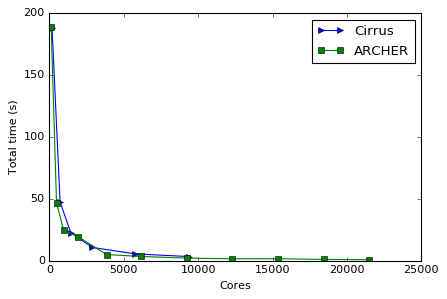

In [8]:
plt.plot(cirruscores, cirrustime, '>-', label='Cirrus')
plt.plot(archercores, archertime, 's-', label='ARCHER')
plt.xlabel('Cores')
plt.ylabel('Total time (s)')
plt.legend(loc='best')

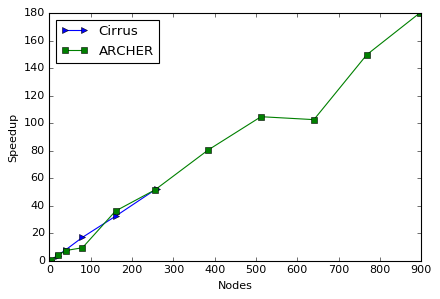

In [14]:
plt.plot([x/cirruscpn for x in cirruscores], cirrussu, '>-', label='Cirrus')
plt.plot([x/archercpn for x in archercores], archersu, 's-', label='ARCHER')
plt.xlabel('Nodes')
plt.ylabel('Speedup')
plt.legend(loc='best')

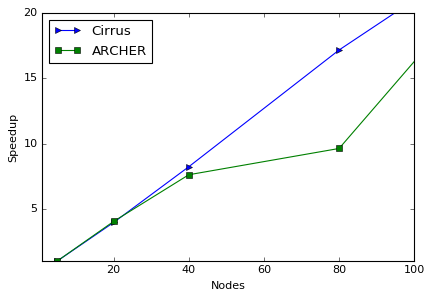

In [15]:
plt.plot([x/cirruscpn for x in cirruscores], cirrussu, '>-', label='Cirrus')
plt.plot([x/archercpn for x in archercores], archersu, 's-', label='ARCHER')
plt.xlim([1,100])
plt.ylim([1,20])
plt.xlabel('Nodes')
plt.ylabel('Speedup')
plt.legend(loc='best')